In [5]:
!pip install datasets

     |████████████████████████████████| 342 kB 5.3 MB/s 
     |████████████████████████████████| 140 kB 46.2 MB/s 
     |████████████████████████████████| 84 kB 3.3 MB/s 
     |████████████████████████████████| 1.1 MB 47.1 MB/s 
     |████████████████████████████████| 212 kB 46.8 MB/s 
     |████████████████████████████████| 127 kB 45.1 MB/s 
     |████████████████████████████████| 144 kB 45.6 MB/s 
     |████████████████████████████████| 271 kB 21.3 MB/s 
     |████████████████████████████████| 94 kB 3.2 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
path_dir = "/content/drive/MyDrive/NLP with Transformers"
os.chdir(path_dir)

In [4]:
from datasets import list_datasets
all_datasets = list_datasets()
print(f"There are {len(all_datasets)} datasets currently available on the Hub")
print(f"The first 10 are: {all_datasets[:10]}")

ModuleNotFoundError: ignored

In [6]:
from datasets import load_dataset
emotions = load_dataset("emotion")

Using custom data configuration default


Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/emotion/default/0.0.0/348f63ca8e27b3713b6c04d723efe6d824a56fb3d1449794716c0f0296072705. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [7]:
train_ds = emotions["train"]

In [8]:
train_ds[7000]

{'label': 5,
 'text': 'i notice i jump when i feel anything in my hair which i cant say im surprised about'}

In [ ]:
train_ds.column_names

['text', 'label']

In [ ]:
train_ds.features

{'label': ClassLabel(num_classes=6, names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None),
 'text': Value(dtype='string', id=None)}

In [ ]:
type(train_ds.features["label"])

datasets.features.features.ClassLabel

In [ ]:
train_ds[5:9]

{'label': [0, 5, 4, 1],
 'text': ['ive been feeling a little burdened lately wasnt sure why that was',
  'ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny',
  'i feel as confused about life as a teenager or as jaded as a year old man',
  'i have been with petronas for years i feel that petronas has performed well and made a huge profit']}

In [ ]:
train_ds['text'][5:9]

['ive been feeling a little burdened lately wasnt sure why that was',
 'ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny',
 'i feel as confused about life as a teenager or as jaded as a year old man',
 'i have been with petronas for years i feel that petronas has performed well and made a huge profit']

## Download Data from Everywhere !

if your data is in your local or uploaded in somewhere, do the following

In [ ]:
#dataset_url = "upload_path"
#!wget dataset_url

In [ ]:
##see a sample of data
#!head -n 1 train.txt

In [ ]:
#dataset_local = load_dataset("csv", data_files="train.txt", sep=";", names=["text", "label"])
##or
##dataset_remote = load_dataset("csv", data_files=dataset_url, sep=";", names=["text", "label"])

# Using Pandas DataFrame

In [11]:
emotions.set_format("pandas")

In [ ]:
(emotions)

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [12]:
import pandas as pd
df = emotions['train'][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [7]:
def label_int2str(row):
  return emotions["train"].features["label"].int2str(row)


In [13]:
df["label_name"] = df["label"].apply(label_int2str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


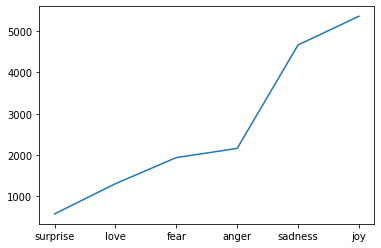

In [14]:
df["label_name"].value_counts(ascending=True).plot()

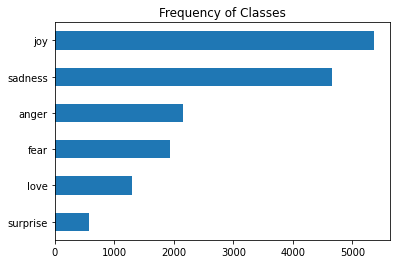

In [15]:
import matplotlib.pyplot as plt
df["label_name"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

In [ ]:
df["text"]

0                                  i didnt feel humiliated
1        i can go from feeling so hopeless to so damned...
2         im grabbing a minute to post i feel greedy wrong
3        i am ever feeling nostalgic about the fireplac...
4                                     i am feeling grouchy
                               ...                        
15995    i just had a very brief time in the beanbag an...
15996    i am now turning and i feel pathetic that i am...
15997                       i feel strong and good overall
15998    i feel like this was such a rude comment and i...
15999    i know a lot but i feel so stupid because i ca...
Name: text, Length: 16000, dtype: object

In [ ]:
df["Words Per Tweet"] = df["text"].str.split().apply(len)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


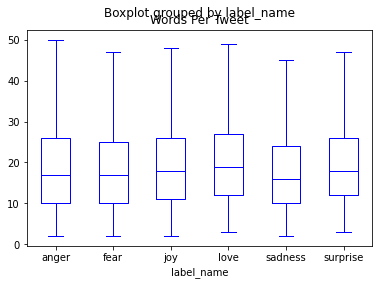

In [ ]:
df.boxplot("Words Per Tweet", by="label_name", grid=False, showfliers=False, color="blue")

In [ ]:
emotions.reset_format()

#Character-Level Tokenization

In [16]:
#example
text = "Tokenizing text is a core task of NLP."
tokenized_text = list(text)
print(tokenized_text)

['T', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ', 'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o', 'f', ' ', 'N', 'L', 'P', '.']


In [ ]:
token2idx = {ch: idx for idx, ch in enumerate(sorted(set(tokenized_text)))}
print(token2idx)

{' ': 0, '.': 1, 'L': 2, 'N': 3, 'P': 4, 'T': 5, 'a': 6, 'c': 7, 'e': 8, 'f': 9, 'g': 10, 'i': 11, 'k': 12, 'n': 13, 'o': 14, 'r': 15, 's': 16, 't': 17, 'x': 18, 'z': 19}


In [ ]:
input_ids = [token2idx[token] for token in tokenized_text]
print(input_ids)

[5, 14, 12, 8, 13, 11, 19, 11, 13, 10, 0, 17, 8, 18, 17, 0, 11, 16, 0, 6, 0, 7, 14, 15, 8, 0, 17, 6, 16, 12, 0, 14, 9, 0, 3, 2, 4, 1]


## One Hot encoding with Pandas

In [ ]:
#bad implementation. because it creates a fictitious ordering between the names
categorical_df = pd.DataFrame(
{"Name": ["Bumblebee", "Optimus Prime", "Megatron"], "Label ID": [0,1,2]})
categorical_df

,Name,Label ID
0,Bumblebee,0
1,Optimus Prime,1
2,Megatron,2


In [ ]:
pd.get_dummies(categorical_df["Name"])

,Bumblebee,Megatron,Optimus Prime
0,1,0,0
1,0,0,1
2,0,1,0


##One Hot encoding in Pytorch

In [ ]:
import torch
import torch.nn.functional as F

In [ ]:
input_ids = torch.tensor(input_ids)
# input_ids.size
input_ids

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


tensor([ 5, 14, 12,  8, 13, 11, 19, 11, 13, 10,  0, 17,  8, 18, 17,  0, 11, 16,
         0,  6,  0,  7, 14, 15,  8,  0, 17,  6, 16, 12,  0, 14,  9,  0,  3,  2,
         4,  1])

In [ ]:
len(token2idx)

20

In [ ]:
#Tensorflow : tf.one_hot(depth = ),
one_hot_encodings = F.one_hot(input_ids, num_classes=len(token2idx))

In [ ]:
one_hot_encodings.size()

torch.Size([38, 20])

In [ ]:
print(f"Token: {tokenized_text[0]}")
print(f"Tensor index: {input_ids[0]}")
print(f"One-hot: {one_hot_encodings[0]}")

Token: T
Tensor index: 5
One-hot: tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


#Word-Level Tokenization

In [ ]:
tokenized_text = text.split()
print(tokenized_text)

['Tokenizing', 'text', 'is', 'a', 'core', 'task', 'of', 'NLP.']


#Subword Tokenization

In [17]:
# !pip install transformers

     |████████████████████████████████| 4.2 MB 5.5 MB/s 
     |████████████████████████████████| 596 kB 46.6 MB/s 
     |████████████████████████████████| 6.6 MB 28.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [18]:
from transformers import AutoTokenizer
model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

In [11]:
print("vocabulary size:               " , tokenizer.vocab_size)
print("model’s maximum context size:    " , tokenizer.model_max_length)
print("model’s input ames :          " , tokenizer.model_input_names)

vocabulary size:                30522
model’s maximum context size:     512
model’s input ames :           ['input_ids', 'attention_mask']


In [14]:
ids = tokenizer.encode(text)

In [15]:
tokenizer.decode(ids)

'[CLS] tokenizing text is a core task of nlp. [SEP]'

In [ ]:
#squeeze is for dimension changing
input_ids = torch.tensor(tokenizer.encode(text, add_special_tokens=True)).unsqueeze(0)

In [19]:
from transformers import DistilBertModel
model = DistilBertModel.from_pretrained('distilbert-base-uncased')

Downloading:   0%|          | 0.00/256M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [20]:
outputs = model(ids)

AttributeError: ignored

In [ ]:
output["last_hidden_state"].shape

torch.Size([1, 13, 768])

In [ ]:
output[0].shape

torch.Size([1, 13, 768])

In [ ]:
print(tokenizer.decode(output["last_hidden_state"]))

TypeError: ignored

In [21]:
tokenizer.special_tokens_map

{'cls_token': '[CLS]',
 'mask_token': '[MASK]',
 'pad_token': '[PAD]',
 'sep_token': '[SEP]',
 'unk_token': '[UNK]'}

##load the specific class manually

In [ ]:
from transformers import DistilBertTokenizer
distilbert_tokenizer = DistilBertTokenizer.from_pretrained(model_ckpt)

##Tokenizing

Two explained methods are same as be shown following

In [22]:
encoded_text_auto = tokenizer([text, "hello world, smile please, woooow"], padding = True)
print(encoded_text_auto.input_ids[0], "\n",encoded_text_auto.input_ids[1])

# encoded_text_manual = distilbert_tokenizer(text)
# print(encoded_text_manual)

[101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102] 
 [101, 7592, 2088, 1010, 2868, 3531, 1010, 15854, 9541, 2860, 102, 0, 0]


In [25]:
tokens_auto1 = tokenizer.convert_ids_to_tokens(encoded_text_auto.input_ids[0])
tokens_auto2 = tokenizer.convert_ids_to_tokens(encoded_text_auto.input_ids[1])


print(tokens_auto1)
print(tokens_auto2)

# tokens_manual = distilbert_tokenizer.convert_ids_to_tokens(encoded_text_manual.input_ids)
# print(tokens_manual)



# The ## prefix in ##izing and ##p means that the preceding string is not whitespace; any token with this prefix 
# should be merged with the previous token when you convert the tokens back to a string

['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '.', '[SEP]']
['[CLS]', 'hello', 'world', ',', 'smile', 'please', ',', 'woo', '##oo', '##w', '[SEP]', '[PAD]', '[PAD]']


In [ ]:
print("len tokens with Autotokenizer : " , len(tokens_auto1))
# print("len tokens with ManualTokenizer : " , len(tokens_manual))
print("len text with split :       " , len(text.split()))

len tokens with Autotokenizer :  13
len text with split :        8


In [26]:
print(tokenizer.convert_tokens_to_string(tokens_auto1))

[CLS] tokenizing text is a core task of nlp. [SEP]


#Tokenizing the Whole Dataset

In [47]:
def tokenize(batch):
  return tokenizer(batch["text"], padding=True, truncation=True)

In [ ]:
print(tokenize(emotions["train"][-2:]))

{'input_ids': [[101, 1045, 2514, 2066, 2023, 2001, 2107, 1037, 12726, 7615, 1998, 10047, 5580, 2008, 1056, 102, 0], [101, 1045, 2113, 1037, 2843, 2021, 1045, 2514, 2061, 5236, 2138, 1045, 2064, 2025, 17279, 2009, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [ ]:
print(tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(tokenize(emotions["train"][-20:]).input_ids[-1])))

[CLS] i know a lot but i feel so stupid because i can not portray it [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


In [ ]:
emotions["train"][-20:]['text']

['i need to work on better nutrition all the time because when i do i feel amazing',
 'i dont even know what i am going to write about but the wines been flowing and the dining rooms are playing on pandora so i am feeling cosmopolitian and artistic tonight',
 'i took a minute to appreciate the trees around me and the calming energy that they gave me at a time when i was feeling a little bit irritable',
 'im still feeling all wimpy it may be another skip around',
 'im feeling a tad bit gracious',
 'i feel i feel fantastic',
 'i had a horrible horrible horrible time and honestly this music the monkees was one of the few things that made me feel truly happy and right now i m tearing up which is stupid because yes i am feeling happy',
 'i feel energized but i find that i am much more outgoing and friendly',
 'i feel pathetic because im still single',
 'i need to do this that and the other for college by such and such a date because for the past four years ive always felt like ive been need

In [24]:
emotions.reset_format()

In [25]:
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [ ]:
len(emotions_encoded['train'][0])

4

In [ ]:
#len for any text is equal because tokenize() function will be applied on the full dataset as a single batch.
len(emotions_encoded['train']['input_ids'][12])

87

In [ ]:
print(emotions_encoded["train"].column_names)

['text', 'label', 'input_ids', 'attention_mask']


#Loading Models

In [26]:
import torch

In [27]:
from transformers import AutoModel
model_ckpt = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [28]:
device

device(type='cuda')

In [ ]:
a#Load model in tensorflow
# from transformers import TFAutoModel
# tf_model = TFAutoModel.from_pretrained(model_ckpt)


#if model just exist for some framework
# tf_xlmr = TFAutoModel.from_pretrained("xlm-roberta-base") ## This get an error
#tf_xlmr = TFAutoModel.from_pretrained("xlm-roberta-base", from_pt=True) ##convert pth weight to tensorflow

In [51]:
def tokenize2(batch, return_tensors):
  return tokenizer(batch, padding=True, truncation=True, return_tensors = return_tensors)

In [52]:
text = ['Hello world, this is a test massege !', "nem hi to every one !"]
inputs = tokenize2(text, return_tensors="pt")
print('Input tensor shape: ', inputs['input_ids'].shape)

Input tensor shape:  torch.Size([2, 12])


In [53]:
tokenizer.convert_ids_to_tokens(tokenizer(text)['input_ids'])

TypeError: ignored

In [54]:
inputs = {k:v.to(device) for k,v in inputs.items()}
with torch.no_grad():
  outputs = model(**inputs)
print(outputs, "\n")
print('hidden_states : ', outputs.hidden_states)
print('hidden_states shape : ', outputs.last_hidden_state.shape)

BaseModelOutput(last_hidden_state=tensor([[[-0.0066, -0.0381,  0.0023,  ..., -0.0941,  0.3002,  0.5314],
         [-0.1870,  0.2584,  0.4746,  ..., -0.1047,  0.5434,  0.4346],
         [ 0.1941,  0.2542,  0.5733,  ..., -0.0996,  0.4836,  0.0975],
         ...,
         [ 0.3687,  0.0222,  0.3403,  ...,  0.0050,  0.1622, -0.1853],
         [-0.1380, -0.1201, -0.0364,  ...,  0.2817,  0.3966,  0.1752],
         [ 0.9191,  0.1738, -0.4786,  ...,  0.1471, -0.5101, -0.2422]],

        [[-0.0683, -0.0142,  0.0230,  ...,  0.0277,  0.2766,  0.3402],
         [-0.0222, -0.4175,  0.2399,  ..., -0.1284,  0.6284,  0.4871],
         [-0.0907,  0.1507,  0.2480,  ..., -0.0357, -0.3276,  0.2807],
         ...,
         [ 0.0999,  0.0693,  0.3981,  ...,  0.2634, -0.0569, -0.0350],
         [ 0.0297,  0.0941,  0.4248,  ...,  0.2360, -0.0611,  0.0607],
         [ 0.0089,  0.2213,  0.4126,  ...,  0.1192, -0.0564,  0.1050]]],
       device='cuda:0'), hidden_states=None, attentions=None) 

hidden_states :  N

In [37]:
inputs

{'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], device='cuda:0'),
 'input_ids': tensor([[  101,  7592,  2088,  1010,  2023,  2003,  1037,  3231,  3742, 24746,
            999,   102]], device='cuda:0')}

In [66]:
#for cls token
outputs.last_hidden_state[:,0].shape

torch.Size([2, 768])

In [68]:
#[batch_size, n_tokens, hidden_dim]
print("[batch_size, n_tokens, hidden_dim] : ", outputs.last_hidden_state.size())

[batch_size, n_tokens, hidden_dim] :  torch.Size([2, 12, 768])


In [ ]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

In [29]:
#extract all the hidden states in one go.
def extract_hidden_states(batch):
# Place model inputs on the GPU
  inputs = {k:v.to(device) for k,v in batch.items() if k in tokenizer.model_input_names}

# Extract last hidden states
  with torch.no_grad():
    last_hidden_state = model(**inputs).last_hidden_state
# Return vector for [CLS] token
  return {"hidden_state": last_hidden_state[:,0].cpu().numpy()}

In [30]:
emotions_encoded.set_format("torch", columns=["input_ids", "attention_mask", "label"])

In [31]:
emotions_encoded.column_names

{'test': ['text', 'label', 'input_ids', 'attention_mask'],
 'train': ['text', 'label', 'input_ids', 'attention_mask'],
 'validation': ['text', 'label', 'input_ids', 'attention_mask']}

In [ ]:
emotions_hidden['train'][0]['hidden_state'].shape

torch.Size([768])

In [ ]:
emotions_encoded['train'][0]['attention_mask'].shape

torch.Size([87])

In [ ]:
emotions_encoded.num_rows

{'test': 2000, 'train': 16000, 'validation': 2000}

In [32]:
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True)

  0%|          | 0/16 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

In [33]:
emotions_hidden["train"].column_names

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']